In [779]:
import requests
from bs4 import BeautifulSoup as soup
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import math
import os


url = 'https://dr15.sdss.org/sas/dr15/apogee/spectro/redux/r8/stars/apo25m/2176/' #APOGEE stars

base_dir = '/Users/ThebestKid/Desktop/Hubble/' 
#base_dir = '/Users/computationalphysics/Desktop/LiamKeeley/hubble/'
fits_dir = base_dir + 'fits/' #Where the fits files go
image_dir = base_dir + 'images'


#Set up directories
try:
    os.mkdir(fits_dir)
except FileExistsError:
    print('fits_dir exists')
    
try:
    os.mkdir(os.path.join(fits_dir, 'LSF'))
except:
    print('LSF exists')

try:
    os.mkdir(os.path.join(fits_dir, 'r8'))
except:
    print('r8 exists')

try:
    os.mkdir(image_dir)
except FileExistsError:
    print('image_dir exists')
#5203 - 2000 = 5417
#5417 / 50 = 108.34 >>>>> 108

#Scrape a fits page from the web and write contents to file
def get_fits(page, target='r8'):
    #get the .fits file
    file_url = page
    req = requests.get(file_url)
    print(file_url)
    path = fits_dir + target + page[page.rfind('/', 0, len(page)-1):len(page)]
    print(path)

    #write binary to local file
    with open(path, 'wb+') as file:
        file.write(req.content)
        

if (len(os.listdir(fits_dir)) <= 5):
    
    view = requests.get(url)
    scraper = soup(view.text)
    for link in scraper.find_all('a'):
        l = link['href']
        print(l)
        if l[:6] == 'apStar':
            get_fits(url + l)
        if l[:9] == 'apStarLSF':
            print('LSF')
        if l[:6] == 'apStar':
            if l[:9] == 'apStarLSF':
                print('LSF')
            else:
                get_fits(url + l)
        else:
            print('Not a star')
else:
    print(os.listdir(fits_dir))
    
    
print(len(os.listdir(fits_dir)))
    #https://dr15.sdss.org/sas/dr15/eboss/spectro/redux/v5_10_0/spectra/3699/spec-3699-55517-0003.fits

fits_dir exists
LSF exists
r8 exists
['.DS_Store', 'r8', 'Test.jpg', '.ipynb_checkpoints', 'cumulative.csv', 'LSF', 'kepler-exoplanet-search-results.zip']
7


In [355]:
file = fits_dir + 'r8/' + os.listdir(fits_dir + 'r8')[3]
print(file)
with fits.open(file) as f:
    header = f[0].header
    print(header['RA'])
    print(header['DEC'])

/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09522392+4408594.fits


KeyError: "Keyword 'RA' not found."

In [780]:
#Figure out fits format
#frequencies = np.zeros(int(round(max)-(round(min))), dtype=int)
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

#Create a histogram from the wavelengths to see a visual representation of the data
def hist(f):
    data = np.zeros(1)
    sigma = None
    mu = None
    with fits.open(f) as file:
        min = np.amin(file[1].data)
        max = np.amax(file[1].data)
        print(min)
        print(max)
        #data = file[1].data[0] 
        data = data[data>0]
        data = reject_outliers(data)
        sigma = np.nanmean(data)
        print('Mean: ' + str(sigma))
        mu = np.nanstd(data)
        print('STD: ' + str(mu))


    num_bins=100
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(data, num_bins)

    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
    ax.plot(bins, y, '--')
    print(y)
    plt.ylabel('Number of Occurences')
    plt.xlabel('Wavelength')
    plt.figure(figsize=(20, 30))
    h_spectrum = [410, 436, 486, 656]

    #for i in h_spectrum:
        #plt.axvline(i, c='y')
        #plt.axvline(i-60, c='r')
    fig.tight_layout()
    plt.show()
    #plt.plot(y)



    

apStar-r8-2MASS-J21013691+6809476.fits
0.0
97125.42
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


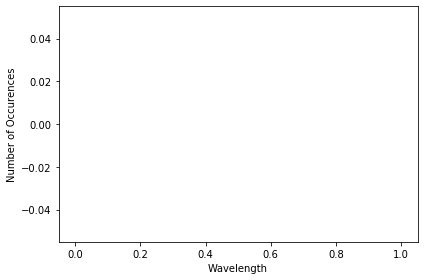

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J00443718+4040456-57280.fits
0.0
0.29458597
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


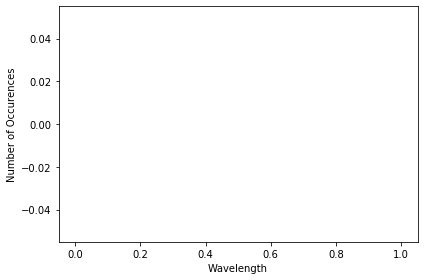

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J23261483+5810546-57307.fits
0.0
0.29461226
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


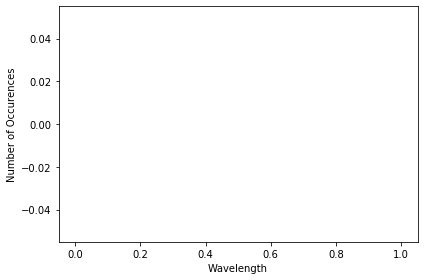

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J14163429-2145500.fits
0.0
24429.467
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


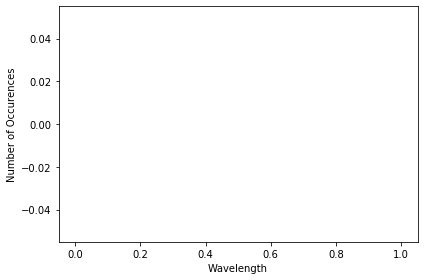

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J05312805+1209102-57445.fits
0.0
0.29462552
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


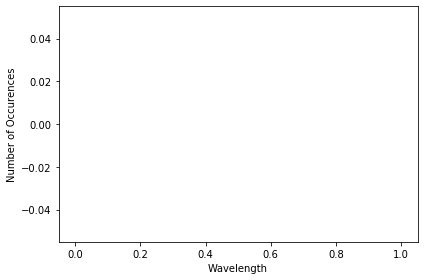

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J18273952-0349520-57194.fits
0.0
0.29458737
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


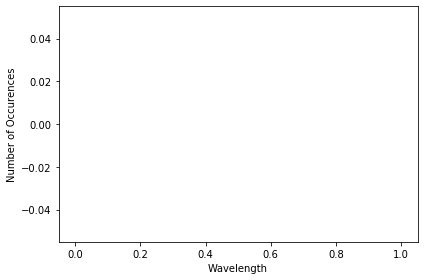

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J03585942+5611127-57282.fits
0.0
0.29458818
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


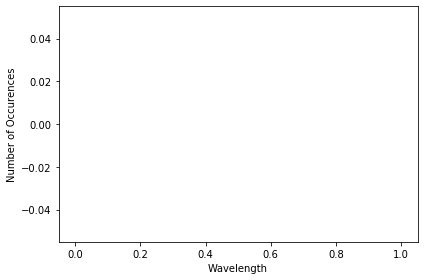

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J04194212+5559577.fits
0.0
0.29462594
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


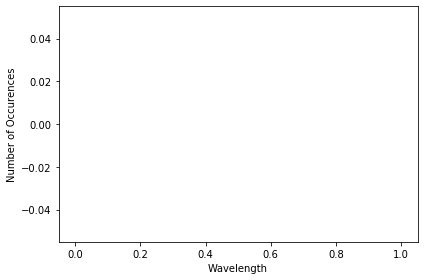

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J05312805+1209102.fits
-30621.934
43629.34
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


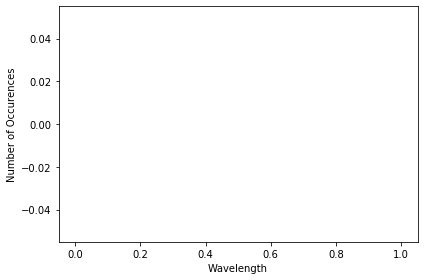

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J06513340-0657592-57419.fits
0.0
149612.28
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


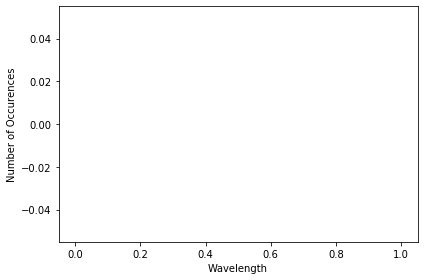

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J01362271+5415023.fits
0.0
0.29458755
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


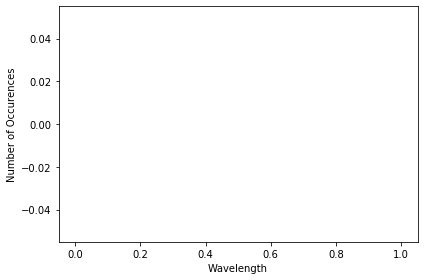

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J19570502+3949363.fits
0.0
83833.88
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


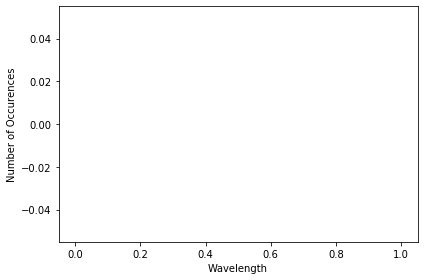

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J03585942+5611127.fits
0.0
0.29458818
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


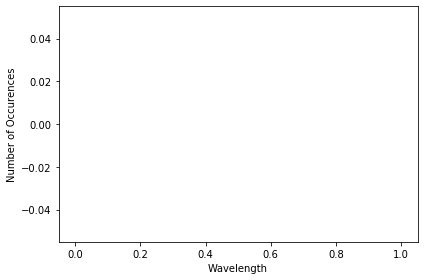

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J18211606-1301256.fits
-44202.74
124208.805
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


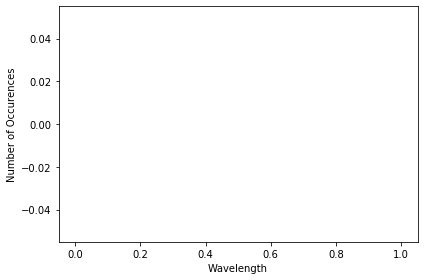

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J06281742-1303109.fits
0.0
103941.12
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


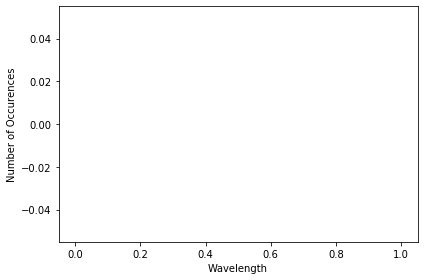

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J17470327+2319454-57543.fits
-2279.5923
20398.219
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


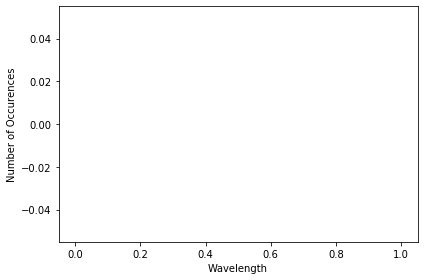

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J21013691+6809476-57194.fits
0.0
97125.42
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


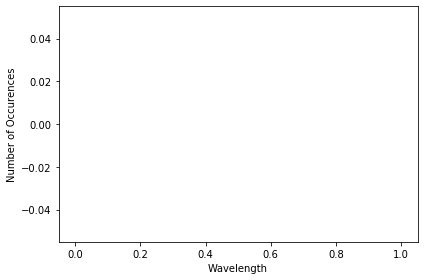

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J06281742-1303109-57419.fits
0.0
103941.12
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


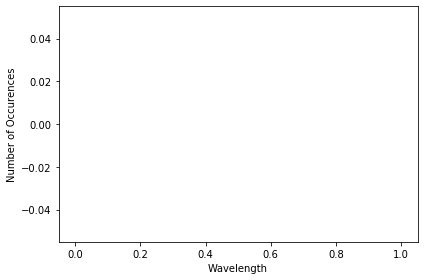

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J06092550-0938492-57418.fits
-3089.4531
13747.689
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


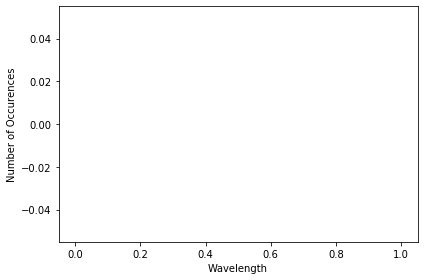

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J19213397+1452570.fits
0.0
162112.81
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


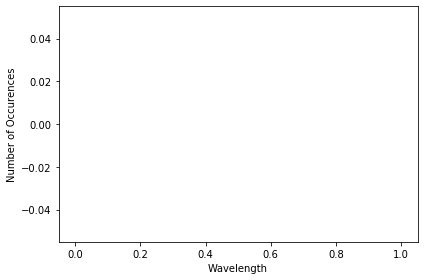

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J01362271+5415023.fits
0.0
82372.17
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


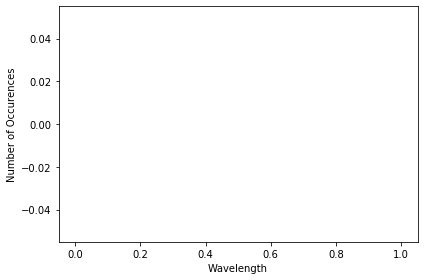

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J19570502+3949363.fits
0.0
0.2945765
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


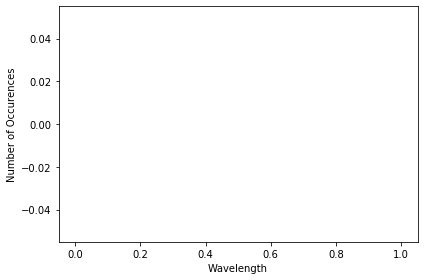

<Figure size 1440x2160 with 0 Axes>

apStar-r8-2MASS-J03585942+5611127.fits
0.0
15984.716
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


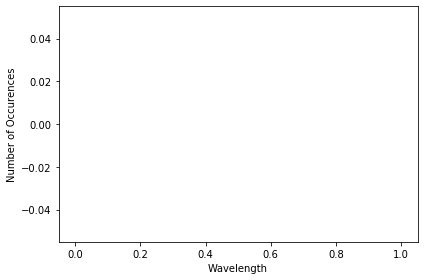

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J18211606-1301256.fits
0.0
0.29456598
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


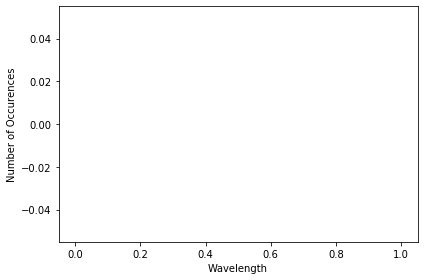

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J06281742-1303109.fits
0.0
0.29462272
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


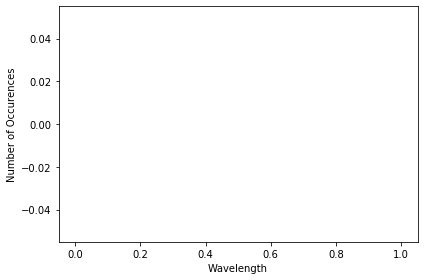

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J01362271+5415023-57280.fits
0.0
0.29458755
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


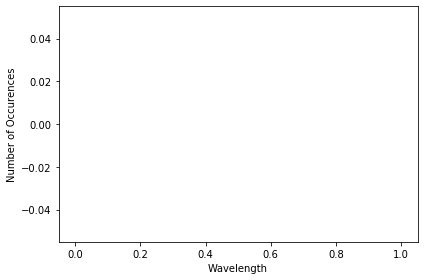

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J19213397+1452570.fits
0.0
0.29458314
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


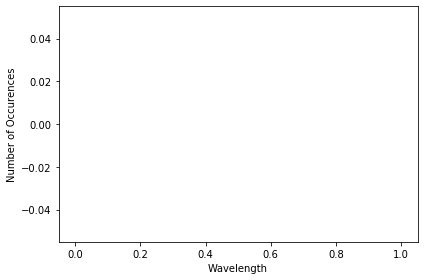

<Figure size 1440x2160 with 0 Axes>

apStarLSF-r8-2MASS-J21013691+6809476.fits
0.0
0.29458877
Mean: nan
STD: nan
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]


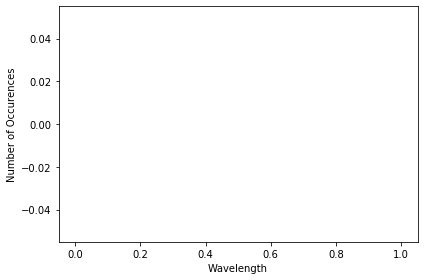

<Figure size 1440x2160 with 0 Axes>

?C=S&O=A


OSError: Header missing END card.

In [288]:

for file in os.listdir(fits_dir + 'r8'):
    print(file)
    try:
        hist(fits_dir + 'r8/' + file)
    except IsADirectoryError:
        print('Is a Directory')

In [781]:
def write_image(target): #target is the relevant fits file; write to a text file so a bulk search for images can be done on SDSS
    ra = 0.0
    dec = 0.0
    try:
        with fits.open(target) as file:
            try:
                header = file[0].header
                ra = header['RA']
                dec = header['DEC']
                print(ra, dec)
            except KeyError:
                print('No RA or DEC')
    
    
        images = '/Users/TheBestKid/Desktop/Hubble/images_ra_dc.txt'
        f = open(images, 'a')
        f.write(str(ra) + ', ' + str(dec))
    except IsADirectoryError:
        print('Not a file')
    
    
    
        

In [365]:
for f in os.listdir(fits_dir + 'r8/'):
    file = fits_dir + 'r8/' + f
    print(file)
    write_image(file)

/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09573570+4256416-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09501989+4341290.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09464794+4304026.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09522392+4408594.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520905+4253094-57096.fits
148.037730404 42.8859476207
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09520922+4233083.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09551392+4340342.fits
148.80803164 43.6761735936
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09514687+4316120.fits
147.945291437 43.2700232558
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09493711+4233597.fits
147.404657102 42.5665888128
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09594376+4208083-57096.fits
149.932347537 42.1356580719
/Users/Thebes

/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09561351+4323273.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M10013391+4236369.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09542313+4345156.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09512425+4314555.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M10012364+4322218-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09484463+4339557.fits
147.185987718 43.6654776641
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09552585+4320191.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09551878+4211332-57096.fits
148.828294726 42.1925810552
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09504340+4407335.fits
147.680871222 44.1259729151
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09565515+4303008-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fit

148.058171376 42.3001249466
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M10012643+4305489.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M10020461+4303154-57096.fits
150.519229328 43.0542824907
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09505366+4212089-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09572695+4255249-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09573570+4256416.fits
149.398765416 42.9449014898
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09511814+4333087.fits
147.825615481 43.5524333144
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09561439+4326193-57096.fits
149.059981791 43.4387049967
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09560171+4341077-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09555456+4431250-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09592533+4229

146.717725276 43.3192860252
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09545356+4410545.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M10000478+4230592-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09531471+4317047.fits
148.311327772 43.2846452106
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09574099+4233475-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09505566+4229218-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09493337+4335407.fits
147.389075536 43.5946664331
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09490061+4231019-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09534299+4206085-57096.fits
148.429164083 42.1023831505
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09534889+4436309.fits
148.453738816 44.6085850838
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09485305+4330068-57

149.547574281 44.3855860586
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09552585+4320191.fits
148.857721028 43.3386535569
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09533690+4212456-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09562505+4306255-57096.fits
149.10441365 43.1070935803
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09540932+4230144.fits
148.538867705 42.504025455
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09533690+4212456.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09562825+4250542-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09512425+4314555.fits
147.851057472 43.2487533997
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M10013391+4236369.fits
150.391323733 42.6102681138
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09561351+4323273.fits
149.056300031 43.3909186593
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09542313+434

No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09534479+4324422-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09580089+4407051-57096.fits
149.503744099 44.1180989199
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09522392+4408594.fits
148.099712068 44.1498564662
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09464794+4304026.fits
146.69976114 43.0673940519
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09550115+4328561-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09501989+4341290.fits
147.582893621 43.6913911806
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09521492+4245039-57096.fits
148.06219715 42.7510954483
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09493711+4233597.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520922+4233083.fits
148.038428615 42.5523262291
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09483595+4402100-5

No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09541983+4359237-57096.fits
148.582638549 43.9899372392
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09515908+4348525-57096.fits
147.996187344 43.8145873211
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09541983+4359237.fits
148.582638549 43.9899372392
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09565515+4303008-57096.fits
149.229799175 43.0502397175
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09474059+4253562.fits
146.919149372 42.8989490315
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09500372+4303277-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M10011685+4329453.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09504143+4209340.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09563377+4358563.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09551878+4211332-57096.fits


No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09562174+4238014-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09542769+4316467-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09583756+4419387.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09492629+4253155.fits
147.359582842 42.8876418361
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09504271+4326138.fits
147.677959467 43.4371868246
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09495769+4345452.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09581141+4423081.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09533690+4212456-57096.fits
148.403766164 42.212672505
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M10011685+4329453.fits
150.320215435 43.4959182525
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09474059+4253562.fits
No RA or DEC
/Users/Thebe

No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09541151+4239013.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09581066+4403085-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09562748+4409407.fits
149.114533566 44.1613163445
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09500372+4303277.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09552396+4422370-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09552572+4307123.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09494819+4426458.fits
147.450808643 44.4460562948
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09483066+4346522.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStarLSF-r8-2M09594352+4256592-57096.fits
No RA or DEC
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09515338+4319505-57096.fits
147.972419357 43.3307145669
/Users/ThebestKid

In [432]:
j = np.zeros(len(os.listdir(fits_dir + 'r8')))
h = np.zeros(len(os.listdir(fits_dir + 'r8')))
temp = np.zeros(len(os.listdir(fits_dir + 'r8')))
fe = np.zeros(len(os.listdir(fits_dir + 'r8')))
a = np.zeros(len(os.listdir(fits_dir + 'r8')))

for i in range(len(os.listdir(fits_dir + 'r8'))):
    path = fits_dir + 'r8/' + os.listdir(fits_dir + 'r8')[i]
    print(path)
    try:
        with fits.open(path) as file:
            header0 = file[0].header
            data = file[9].data
            try:
                j[i] = header0['J']
            except KeyError:
                print('no J')
                j[i] = np.nan

            try:
                h[i] = header0['H']
            except KeyError:
                print('no H')
                h[i] = np.nan

            try:
                temp[i] = header0['RVTEFF']
            except KeyError:
                print('no temp')
                temp[i] = np.nan
            
            fe[i] = data['FEH']
    except OSError:
        print('Not .fits')
                

print(j)
print(h)
print(a)


/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520905+4253094-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09514687+4316120.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09493711+4233597.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09524514+4402040.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09501169+4358265.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09515813+4302365-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09524577+4309036-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520169+4330503.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09464335+4251250.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09493337+4335407-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09465346+4339196-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09511814+4333087-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09490061+42

/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520922+4233083-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09512425+4314555.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09483595+4402100.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09530553+4237367.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09505366+4212089.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09480067+4343375-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09505871+4214042-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523608+4345208-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523379+4212089-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09514054+4403586-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523608+4345208.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09513182+4423431.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09490044+42

/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09512425+4314555-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523379+4212089.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09503071+4426236-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09520906+4213201.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09521492+4245039.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09524428+4149218-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09494283+4317560-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523182+4229337-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09523937+4304089-57096.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09511992+4319386.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09480181+4318062.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09505871+4214042.fits
/Users/ThebestKid/Desktop/Hubble/fits/r8/apStar-r8-2M09494819+44

In [344]:
fe

array([ 0.5, -0.5, -0.5,  0.5,  0.5, -0.5,  0.5, -1.5, -0.5,  0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -1. , -0.5, -0.5,
       -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5,
       -1. ,  0.5, -0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,
        0.5, -1.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5,
        0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,
       -0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0. ,  0.5, -0.5, -1.5,  0.5,
       -0.5, -2.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0. ,  0.5,  0.5,
        0.5, -2.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5,
        0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,
       -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,
        0.5,  0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.5, -0

ValueError: x and y must be the same size

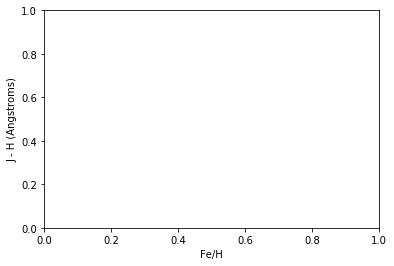

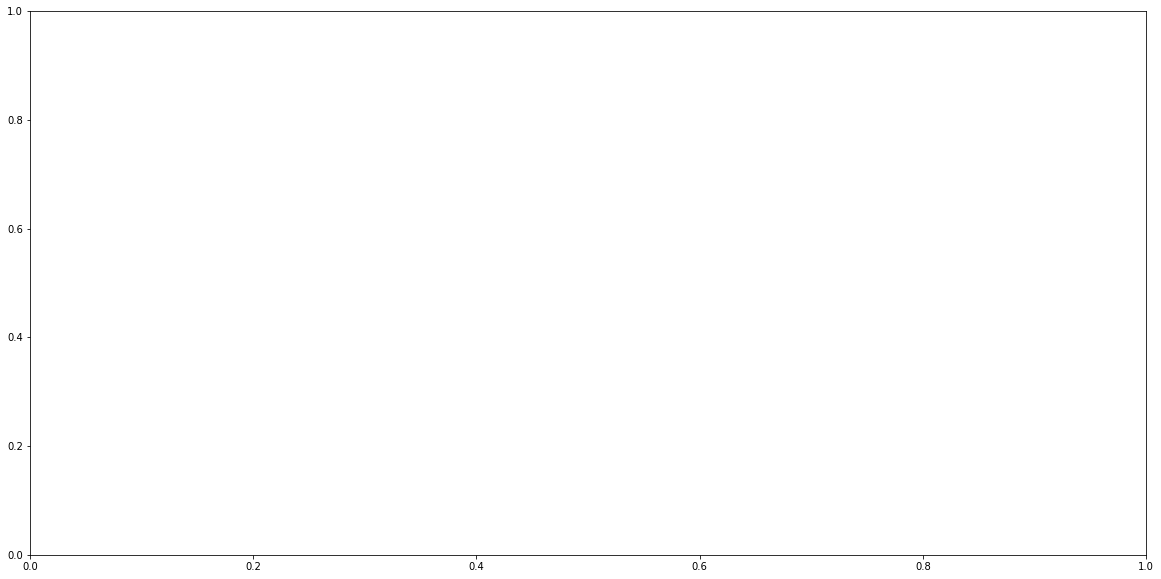

In [532]:
y = j 

plt.xlabel('Fe/H')
plt.ylabel('J - H (Angstroms)')
plt.figure(figsize=(20,10))
plt.scatter(fe, y)
plt.show

In [367]:
for file in os.listdir('/Users/TheBestKid/Desktop/Hubble/fits/r8/'):
    print(file)
    try:
        os.remove('/Users/TheBestKid/Desktop/Hubble/fits/r8/' + file)
    except PermissionError:
        print('Permision Denied!')

.DS_Store


In [325]:
labels = temp
len(labels)




292

In [782]:
import pandas as pd
#NASA exoplanet search data from https://www.kaggle.com/nasa/kepler-exoplanet-search-results/downloads/kepler-exoplanet-search-results.zip/2
exoplanet_data = pd.read_csv(fits_dir + 'cumulative.csv')

#Right ascension for each exoplanet
exo_ra = exoplanet_data['ra']
#Declination for each exoplanet
exo_dec = exoplanet_data['dec']

In [392]:
#Create txt file for bulk search
star_coords = base_dir + 'star_coords_0.txt'
star_tracker = 0

if len(exo_ra) == len(exo_dec):
    for i in range(len(exo_ra)):
        if ((i+1)%1000) == 0:
            star_tracker = star_tracker + 1
            star_coords = base_dir + 'star_coords_' + str(star_tracker) + '.txt'
        
        with open(star_coords, 'at') as f:
            f.write(str(exo_ra[i]) + ',' + str(exo_dec[i]) + '\n')

In [386]:
#Create csv files for data because csv data cannot be downloaded or scraped from website directly; just manual cmdc cmdv
for f in os.listdir(base_dir):
    if f[:4] == 'star':
        with open(f[:-4] + '.csv', 'wt+'):
            pass





In [784]:
#Get the run, camcol, and field for each relevant picture 
#This data was manually gathered from https://dr12.sdss.org/bulkFields/raDecFile using each star_coords file
#
run = np.zeros((10, 500))
camcol = np.zeros((10, 500))
field = np.zeros((10, 500))

for f in os.listdir(base_dir):
    print(f[-4:])
    if f[-4:] == '.csv':
        print(f)
        
        #Reformat csv's because SDSS doesn't know what a csv is 
        read = open(base_dir + f, 'rt')
        new_str = read.read().replace(' ', '\n')
        read.close()
        write = open(base_dir + f, 'wt+')
        write.write(new_str)
        write.close()
        
        csv_data = pd.read_csv(base_dir + f)
        print(csv_data['Run'])
        #np.reshape(run[int(f[12])], (len(csv_data['Run'])))
        #np.reshape(camcol[int(f[12])], (len(csv_data['Camcol'])))
        #np.reshape(field[int(f[12])], (len(csv_data['Field'])))
        
        for i in range(len(csv_data['Run'])):
            print(csv_data['Run'][i])
            run[int(f[12]), i] = csv_data['Run'][i]
        for i in range(len(csv_data['Camcol'])):
            camcol[int(f[12]), i] = csv_data['Camcol'][i]
        for i in range(len(csv_data['Field'])):
            field[int(f[12]), i] = csv_data['Field'][i]   

.txt
.txt
tore
.jpg
ages
pynb
.csv
star_coords_0.csv
0     6177
1     6177
2     6177
3     6177
4     6177
5     6177
6     6177
7     6177
8     6177
9     6177
10    6177
11    6177
12    6177
13    6177
14    6177
15    6177
16    6177
17    6177
18    6177
19    6177
20    6177
21    6177
22    6177
23    6177
24    6177
25    6177
26    6177
27    6177
28    6177
29    6177
      ... 
59    5403
60    5403
61    5403
62    5403
63    5403
64    5403
65    5403
66    5403
67    5403
68    5403
69    5403
70    5403
71    5403
72    5403
73    5403
74    5403
75    5403
76    5403
77    5403
78    5403
79    5403
80    5403
81    5403
82    5403
83    5403
84    5403
85    5403
86    5403
87    5403
88    5403
Name: Run, Length: 89, dtype: int64
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
6177
5416
5416
5416
5416
5416
5416
5416
5416
5416
5416
5416
5416


In [785]:
#Get rid of extra zeros in each array and flatten into one contiguous vector for run, camcol, and field

run = np.delete(run, 0)
camcol = np.delete(camcol, 0)
field = np.delete(field, 0)
    
print(len(run))

4999


In [789]:
#Query data from each [run camcol field] entry:
    #The specified image
    #The Images' actual ra
    #The Images' actual dec
    

absolute_ra = []
absolute_dec = []

image_dir = base_dir + 'image_data'
base_url = 'https://dr12.sdss.org/'

try:
    os.mkdir(image_dir)
except FileExistsError:
    print('Image_data exists')

for i in range(15):
    par = {'run' : int(run[i]), 'camcol' : int(camcol[i]), 'field' : int(field[i])}
    page_url = 'https://dr12.sdss.org/fields/runCamcolField'
    r = requests.get(page_url, params=par, verify=False)
    
    s = soup(r.text)
    dd = s.find_all('dd')
    #ra value is the tenth dd tag in each page and dec the eleventh
    absolute_ra.append(float(str(dd[9])[4:-5]))
    absolute_dec.append(float(str(dd[10])[4:-5]))
    
    #jpg download link is the 17th link on EACH photoObj webpage
    jpg_link = s.find_all('a')[16]['href']
    jpg_req = requests.get(base_url + jpg_link)
    file_path = str(par['run'])+ '-' + str(par['camcol']) + '-' + str(par['field']) + '.jpg'
    
    with open(image_dir + '/' + file_path, 'wb+') as f:
        #print(f)
        f.write(jpg_req.content)

print(absolute_ra)
print(absolute_dec)

Image_data exists


/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


SSLError: HTTPSConnectionPool(host='dr12.sdss.org', port=443): Max retries exceeded with url: //sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0025.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

In [790]:
#Find the height and width for an image
from PIL import Image as img

image_1 = img.open(base_dir + '15.3074716282.jpg', 'r')
pixels = image_1.getdata()
print(pixels.size)

(2048, 1489)


In [791]:
#Calculate the change in ra per height pixel for an image and the change in dec per width pixel
d_ra = 299.98752703-299.790643138
d_dec = 15.3074716282-15.070211347
h = 1489
w = 2048

d_in_ra_h = d_ra/h
d_in_dec_w = d_dec/w
print('change in ra per height pixel: ' + str(d_in_ra_h))
print('change in dec per width pixel: ' + str(d_in_dec_w))

change in ra per height pixel: 0.00013222558226999104
change in dec per width pixel: 0.00011584974667968716


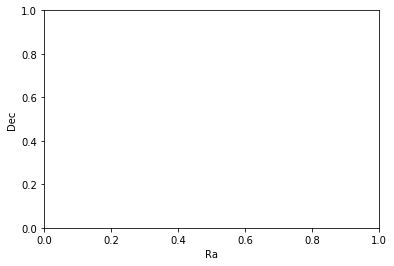

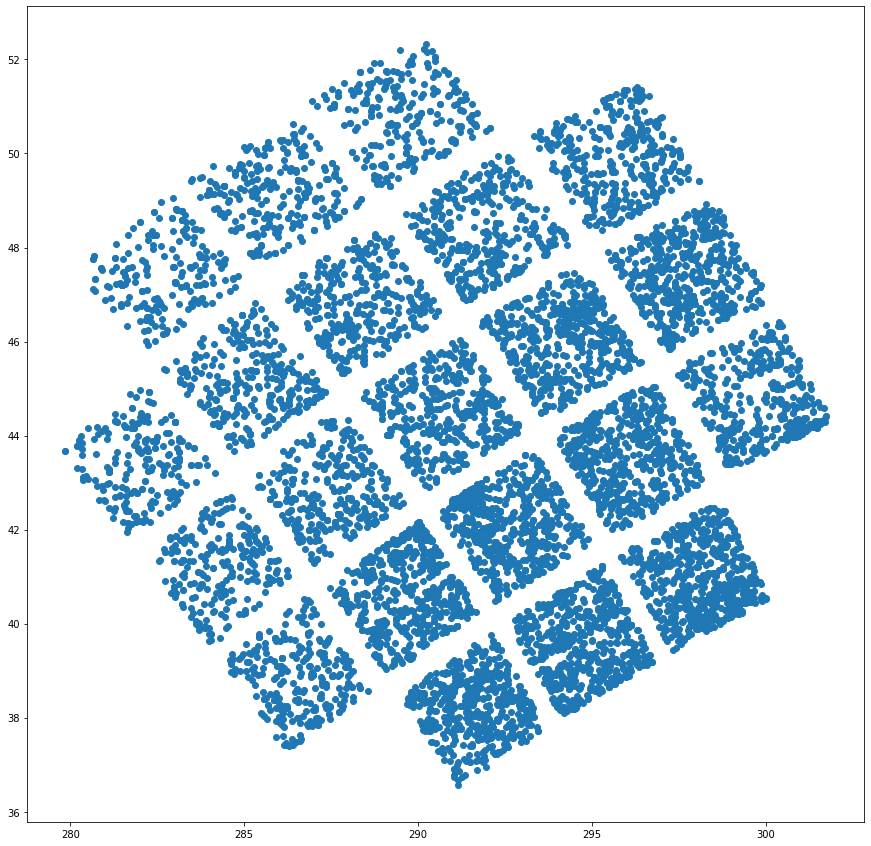

In [792]:
star_coords = pd.read_csv('all_star_coords.txt')
plt.xlabel('Ra')
plt.ylabel('Dec')
ra = exoplanet_data['ra']
dec = exoplanet_data['dec']
plt.figure(figsize=(15, 15))
plt.scatter(ra, dec)

In [793]:
max_ra = np.amax(ra)
min_ra = np.amin(ra)
max_dec = np.amax(dec)
min_dec = np.amin(dec)

print('Ra range: ' + str(np.amin(ra)) + '--'  + str(np.amax(ra)))
print('Dec range: ' + str(np.amin(dec)) + '--' + str(np.amax(dec)))

print('Change in ra: ' + str(d_ra))
print('Change in dec: ' + str(d_dec))

Ra range: 279.85272000000003--301.72076
Dec range: 36.577381--52.336009999999995
Change in ra: 0.19688389200001666
Change in dec: 0.2372602811999993


In [794]:
num_pics_ra = (max_ra-min_ra)/d_ra
print(num_pics_ra)

num_pics_dec = (max_dec-min_dec)/d_dec
print(num_pics_dec)


111.07074214074404
66.41916177582293


In [795]:
pic_ra_coords = []
pic_dec_coords = []

for i in range(int(num_pics_ra)):
    pic_ra_coords.append(min_ra + (i*d_ra))


for i in range(int(num_pics_dec)):
    pic_dec_coords.append(min_dec + (i*d_dec))
    

In [ ]:
img_matrix = [] #array of tuples (ra, dec, image_link)

for i in pic_ra_coords:
    for j in pic_dec_coords:
        #print(str(i) + ', ' + str(j))
        r = requests.get('https://dr12.sdss.org/fields/raDec?', params={'ra' : i, 'dec' : j}, verify=False)
        #print(r.url)
        s = soup(r.text)
        jpg_link = s.find_all('a')[16]['href']
        print(jpg_link[-4:])
        if jpg_link[-4:] == '.jpg':
            dd = s.find_all('dd')
            tup = ((float(str(dd[9])[4:-5])), (float(str(dd[10])[4:-5])), jpg_link)
            print(tup)
            img_matrix.append(tup)

                    
img_matrix

In [ ]:
#This plot shows that unfortunatly there is not that much available data that has both a picture and an annotation
from scipy.optimize import curve_fit
x = []
y = []

for i in img_matrix:
    if i[2] == 'NaN':
        pass
    else:
        x.append(i[0])
        y.append(i[1])

#def quad_fit(a, b, c, x):
    #return a*x**2 + a*x + c

#a_fit, cov = curve_fit(quad_fit, x[:814], y[:814])


print(a_fit)
print(len(x))
plt.figure(figsize=(20,20))    

best_fits = []
for i in x:
    best_fits.append(quad_fit(a_fit[0], a_fit[1], a_fit[2], i))

plt.scatter(x, y, c='b', marker="s", label='first')
plt.scatter(ra, dec, c='r', marker="o", label='second')
plt.show()

In [821]:
#remove nans
i = 0

while i < len(img_matrix):
    if img_matrix[i][2] == 'NaN':
        del img_matrix[i]
    else:
        i = i+1

img_matrix

[]

898
897
0


ValueError: x and y must be the same size

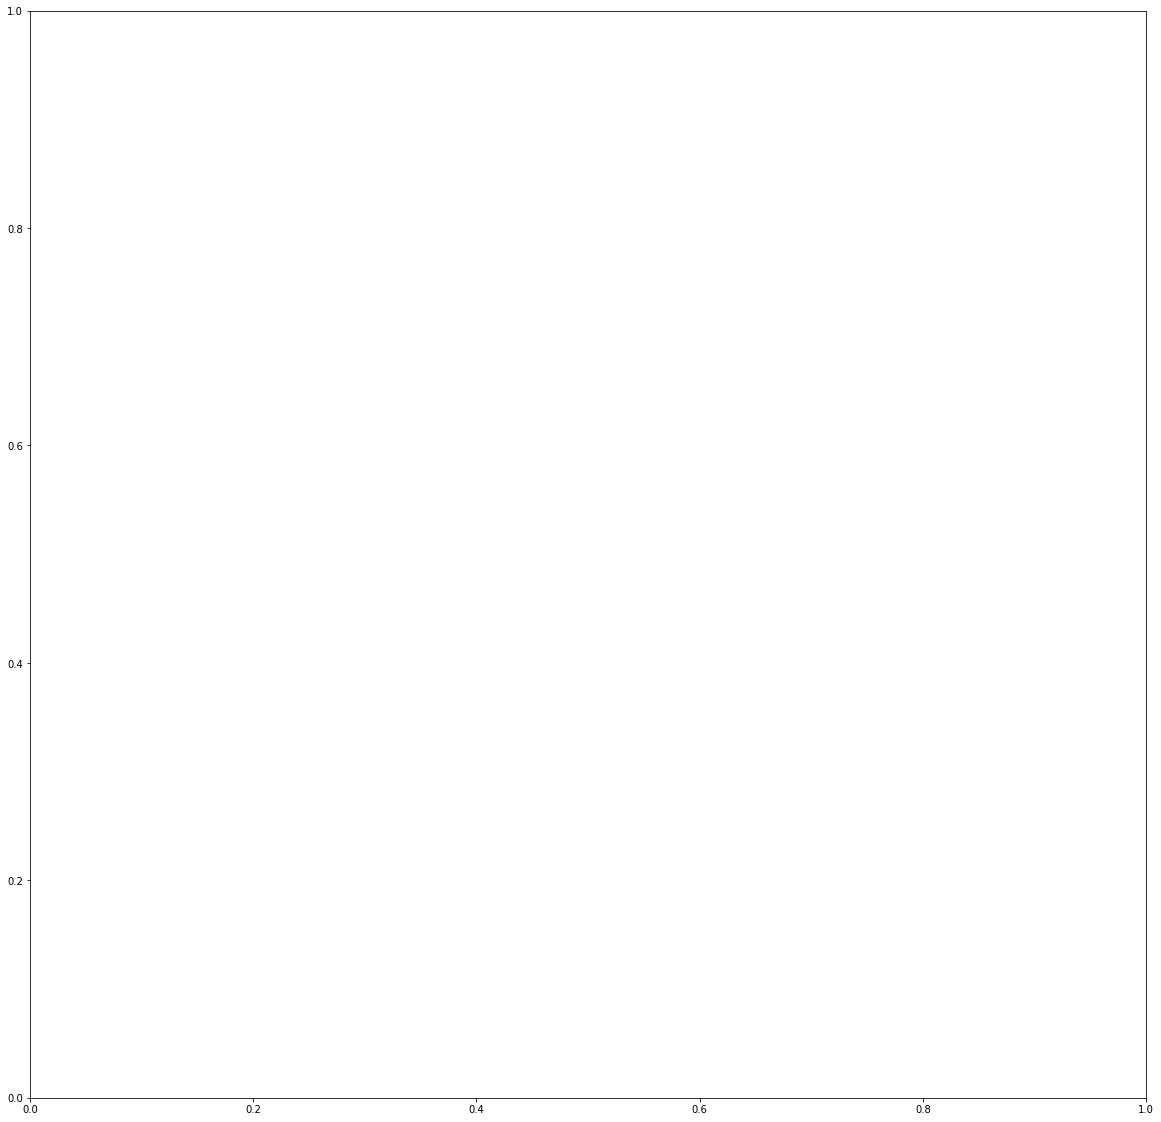

In [806]:
#Symmetry around x-axis demonstrates that the calculated d_in_ra_h is valid within an image
    #If it was too great, then the graph would be shifted above the x-axis, and the opposite would be true in th
delta_r = []
delta_d = []

for i in range(1, len(img_matrix)):
    delta_r.append((img_matrix[i][0]-img_matrix[i-1][0])-d_in_ra_h)
    delta_d.append(img_matrix[i][1]-img_matrix[i-1][1]-d_in_dec_w)

#The imaging is not contiguous in r
print(len(img_matrix))
print(len(delta_r))
print(len(x))
delta_r.append(0)
plt.figure(figsize=(20,20))
plt.scatter(x, delta_r)
    

In [ ]:
#The value for delta_d_in_w appears to be too high
#It makes more sense that it would be a 1:1 ratio for delta_ra and delta_dec:
delta_d.append(0)
plt.figure(figsize=(20,20))
plt.scatter(y, delta_d)
    

In [ ]:
#The values of delta_d and delta_r need to be refined, but...
cropped_image_dir = image_dir + '/cropped/'
try:
    os.mkdir(cropped_image_dir)
except:
    print('cropped exists')

    
    
def zoom(pic_ra, pic_dec, abs_ra, abs_dec, image_path):
    #pixel (0, 0) = (pic_ra, pic_dec) 
    #Therefore, pixel (0 + (delta_ra * d_in_ra_h), 0 + (delta_dec * d_in_dec_w))
    #Zoom to 128 by 128
    delta_ra = pic_ra - abs_ra
    delta_dec = pic_dec - abs_dec
    
    pix_x = delta_dec*(1/d_in_dec_w)
    pix_y = delta_ra*(1/d_in_ra_h)
    
    print((pix_x, pix_y))
    #left = int(pix_x) - 64
    #right = int(pix_x) + 64
    #lower = int(pix_y) - 64 
    #upper = int(pix_y) + 64
    
    new_path = cropped_image_dir + 'ra-' + str(abs_ra) + '-dec-' + str(abs_dec) + '.jpg'
    image = img.open(image_path)
    
    #print((left, right, lower, upper))
    out_image = image.crop(box=(pix_x, pix_y, 128 + pix_x, 128 + pix_y)) # left, upper, right, and lower
    out_image.save(new_path)
    
    
zoom(img_matrix[0][0], img_matrix[0][1], img_matrix[0][0]-0.02, img_matrix[0][1]-0.02, image_dir + '/' + os.listdir(image_dir)[2])

(172.63740813608428, 151.25666044823208)


In [ ]:
min_ra_max = []

for i in range(len(img_matrix)):
    min_ra_max.append((img_matrix[i][0], img_matrix[i][0]+1489*d_in_ra_h))

    
len(min_ra_max)

In [ ]:
min_dec_max = []

for i in range(len(img_matrix)):
    min_dec_max.append((img_matrix[i][1], img_matrix[i][1]+2048*d_in_dec_w))
    
len(min_dec_max)

In [811]:
exoplanet_data['image_num'] = np.zeros(len(exoplanet_data['ra']), dtype=int)

In [812]:
def in_coords(ra_range, dec_range, ra, dec): #box: (min_ra, max_ra) (min_dec, max_dec)
    return (ra_range[0] - ra <= 0) and (ra_range[1] - ra >= 0) and (dec_range[0] - dec <= 0) and (dec_range[1] - dec >= 0)

in_coords(min_ra_max[0], min_dec_max[0], 280, 41)

False

In [813]:
image_tracker = np.zeros(len(min_ra_max), dtype=int)

for i in range(len(min_ra_max)):
    for j in range(len(ra)):
        if in_coords(min_ra_max[i], min_dec_max[i], ra[j], dec[j]):
            print('match: ' + str(i) + ', ' + str(j))
            exoplanet_data['image_num'][j] = i
            image_tracker[i] = 1
            break
            

match: 77, 5547


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


match: 88, 5547
match: 99, 4687
match: 100, 9082
match: 155, 5718
match: 165, 3393
match: 167, 7074
match: 174, 2120
match: 175, 1527
match: 177, 3429
match: 178, 9283
match: 179, 2785
match: 186, 124
match: 187, 5927
match: 188, 9239
match: 189, 1844
match: 190, 3429
match: 191, 4749
match: 197, 123
match: 198, 124
match: 199, 4390
match: 200, 3258
match: 201, 4706
match: 202, 1844
match: 203, 2230
match: 208, 1330
match: 209, 1489
match: 211, 3127
match: 213, 6154
match: 214, 2230
match: 218, 4623
match: 220, 3792
match: 221, 4062
match: 222, 3798
match: 223, 4455
match: 225, 7631
match: 229, 6057
match: 230, 114
match: 231, 5658
match: 233, 4222
match: 234, 2071
match: 235, 1509
match: 237, 157
match: 242, 3118
match: 244, 2118
match: 245, 6973
match: 246, 5928
match: 248, 1639
match: 254, 4579
match: 256, 7058
match: 257, 1831
match: 258, 1656
match: 265, 2632
match: 266, 2381
match: 267, 6232
match: 268, 6281
match: 269, 2134
match: 270, 3471
match: 271, 3417
match: 273, 2761
matc

In [814]:
print(len(min_ra_max))
print(len(min_dec_max))

898
898


In [816]:
drop_indices = []

for i in range(len(exoplanet_data['image_num'])):
    if exoplanet_data['image_num'][i] == 0:
        drop_indices.append(i)

exoplanet_data = exoplanet_data.drop(drop_indices)

In [817]:
exoplanet_data

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,image_num
24,25,2306756,K00113.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,0,1,0,...,4.081,0.014,-0.014,1.580,0.064,-0.064,292.27374,37.671558,12.394,716
73,74,3342970,K00800.01,Kepler-234 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.442,0.054,-0.216,1.076,0.353,-0.118,291.65353,38.494659,15.541,683
79,80,2440757,K00792.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.220,0.156,-0.117,1.339,0.230,-0.230,290.84369,37.728828,15.122,637
80,81,2445129,K00793.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,4.409,0.084,-0.196,1.060,0.319,-0.137,291.84891,37.713501,15.065,698
81,82,2713049,K00794.01,Kepler-683 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.350,0.126,-0.103,1.062,0.154,-0.140,291.43997,37.905659,15.026,670
82,83,3114167,K00795.01,Kepler-684 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.656,0.028,-0.112,0.679,0.112,-0.037,290.87051,38.273628,15.591,640
83,84,3114661,K00796.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,4.678,0.028,-0.083,0.636,0.080,-0.040,290.99689,38.284920,15.748,651
84,85,3115833,K00797.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,4.541,0.048,-0.192,0.836,0.234,-0.078,291.28195,38.241669,15.657,661
85,86,4139816,K00812.02,Kepler-235 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954,358
94,95,3641726,K00804.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,4.526,0.063,-0.108,0.820,0.141,-0.082,290.33362,38.728230,15.387,619


In [819]:
print(len(image_tracker))
print(len(img_matrix))

i = 0
while i <= len(image_tracker):
    if image_tracker[i] == 0:
        np.delete(image_tracker, i)
        del img_matrix[i]
    else:
        i = i+1

898
0


IndexError: list assignment index out of range

In [820]:
print(len(img_matrix))
print(len(image_tracker))

0
898
